# Personalized Medicine: Redefining Cancer Treatment

In [1]:
#Required Libraries and packages
import pandas as pd
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import normalize
from collections import Counter
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [2]:
# Loading training_variants. Its a comma seperated file
data_variants = pd.read_csv('/home/krupal/training_variants')
# Loading training_text dataset. This is seperated by ||
data_texts = pd.read_csv('/home/krupal/training_text',sep = "\|\|",engine = 'python',names = ['ID','TEXT'],skiprows = 1)

In [3]:
data_variants.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
data_texts.head(3)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...


In [5]:
data_variants.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [6]:
data_texts.describe()

,ID
count,3321.000000
mean,1660.000000
std,958.834449
min,0.000000
25%,830.000000
50%,1660.000000
75%,2490.000000
max,3320.000000


In [7]:
data_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
TEXT    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [16]:
data_variants.shape

(3321, 4)

In [8]:
#Preprocessing text data
# We would like to remove all stop words like a, is, an, the, ... 
stop_words = set(stopwords.words('english'))

In [9]:

def data_preprocessing(total_text,ind,col):
    if type(total_text) is not int:
        string = ""
         # replacing all special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]'," ",str(total_text))
        total_text = re.sub('\d+'," ",str(total_text))
        # replacing multiple spaces with single space
        total_text = re.sub('\s+'," ",str(total_text))
        total_text = total_text.strip()
        # bring whole text to same lower-case scale.
        total_text = total_text.lower()
        #print(total_text)
        for word in total_text.split():
            if not word in stop_words:
                #print(word)
                string += word
                string += ' '
        data_texts[col][ind] = string

for index,row in data_texts.iterrows():
    if type(row['TEXT']) is str:
        data_preprocessing(row['TEXT'],index,'TEXT')
        

/home/krupal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [6]:
data_texts['TEXT'][3]

'recent evidence demonstrated acquired uniparental disomy aupd novel mechanism pathogenetic mutations cancer may reduced homozygosity help identify novel mutations myeloproliferative neoplasms mpns performed genome wide single nucleotide polymorphism snp screen identify aupd patients atypical chronic myeloid leukemia acml n jak mutation negative myelofibrosis mf n jak mutation negative polycythemia vera pv n stretches homozygous copy neutral snp calls greater mb seen acml mf absent pv total different chromosomes involved q q affected acml cases cbl mutations identified cases q aupd analysis additional mpns revealed total cbl variants patients acml myelofibrosis chronic myelomonocytic leukemia variants missense substitutions ring linker domains abrogated cbl ubiquitin ligase activity conferred proliferative advantage cells overexpressing flt conclude acquired transforming cbl mutations novel widespread pathogenetic abnormality morphologically related clinically aggressive mpns introduct

In [10]:
final_data = pd.merge(data_variants,data_texts,on = 'ID',how = 'left')

In [11]:
final_data.isnull()

,ID,Gene,Variation,Class,TEXT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [12]:
final_data.head(3)

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...


In [13]:
final_data.dropna()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...
5,5,CBL,V391I,4,oncogenic mutations monomeric casitas b lineag...
6,6,CBL,V430M,5,oncogenic mutations monomeric casitas b lineag...
7,7,CBL,Deletion,1,cbl negative regulator activated receptor tyro...
8,8,CBL,Y371H,4,abstract juvenile myelomonocytic leukemia jmml...
9,9,CBL,C384R,4,abstract juvenile myelomonocytic leukemia jmml...


In [14]:
final_data[final_data.isnull().any(axis = 1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [15]:
final_data.dropna(axis = 0, how = 'all')

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...
5,5,CBL,V391I,4,oncogenic mutations monomeric casitas b lineag...
6,6,CBL,V430M,5,oncogenic mutations monomeric casitas b lineag...
7,7,CBL,Deletion,1,cbl negative regulator activated receptor tyro...
8,8,CBL,Y371H,4,abstract juvenile myelomonocytic leukemia jmml...
9,9,CBL,C384R,4,abstract juvenile myelomonocytic leukemia jmml...


In [16]:
final_data.loc[final_data['TEXT'].isnull(),'TEXT'] = final_data['Gene'] + ' ' + final_data['Variation']

In [17]:
final_data.Gene = final_data.Gene.str.replace('\s+','_')
final_data.Variation = final_data.Variation.str.replace('\s+','_')

In [18]:
y_true = final_data['Class'].values

In [19]:
y_true

array([1, 2, 2, ..., 1, 4, 4])

In [20]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(final_data, y_true, test_size = 0.2)
# split the train data now into train validation and cross validation
X_train, X_cv, y_train ,y_cv = train_test_split(X_train, y_train, test_size = 0.2)

In [21]:
print("Number of data points in training set :",X_train.shape[0])
print("Number of data points in test set : ",X_test.shape[0])
print("Number of data points in cross_validation : ",X_cv.shape[0])

Number of data points in training set : 2124
Number of data points in test set :  665
Number of data points in cross_validation :  532


In [22]:
train_class_distribution = X_train['Class'].value_counts().sort_index()
test_class_distribution = X_test['Class'].value_counts().sortlevel()
cv_class_distribution = X_cv['Class'].value_counts().sortlevel()

/home/krupal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  
/home/krupal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


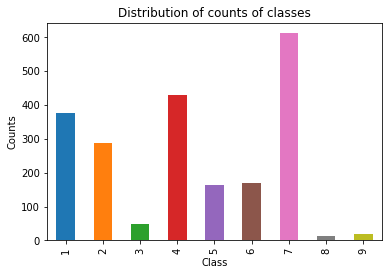

In [23]:
#Visualising the distribution
train_class_distribution.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Distribution of counts of classes')
plt.show()

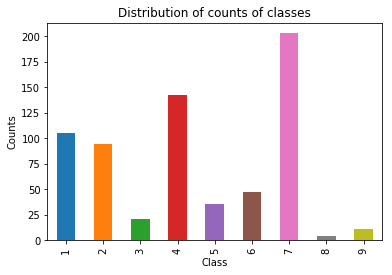

In [24]:
test_class_distribution.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Distribution of counts of classes')
plt.show()

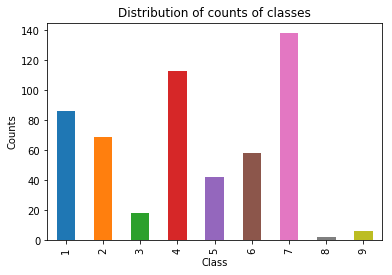

In [25]:
cv_class_distribution.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Distribution of counts of classes')
plt.show()

In [26]:
#Building a Random Model
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

In [27]:
# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
test_predicted_y = np.zeros((test_data_len,9))


In [28]:
random_probs = np.random.rand(1,9)

In [29]:
random_probs

array([[ 0.89870983,  0.01421492,  0.19261727,  0.05835398,  0.98746824,
         0.6492833 ,  0.16735407,  0.14196947,  0.27661542]])

In [30]:
sum(random_probs)

array([ 0.89870983,  0.01421492,  0.19261727,  0.05835398,  0.98746824,
        0.6492833 ,  0.16735407,  0.14196947,  0.27661542])

In [31]:
sum(sum(random_probs))

3.3865865102789536

In [32]:
for i in range(cv_data_len):
    random_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((random_probs/sum(sum(random_probs)))[0])
print("Log-loss from cross validation set: ",log_loss(y_cv,cv_predicted_y,eps = 1e-15))

Log-loss from cross validation set:  2.49474963192


In [33]:
# Test-Set error.
#we create a output array that has exactly same as the test data
for i in range(test_data_len):
    random_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((random_probs/sum(sum(random_probs)))[0])
print("Log-loss from cross validation set: ",log_loss(y_test,test_predicted_y,eps = 1e-15))

Log-loss from cross validation set:  2.47011766819


In [34]:
test_predicted_y

array([[ 0.03960102,  0.1226225 ,  0.18044918, ...,  0.26010627,
         0.07027543,  0.09034866],
       [ 0.10178528,  0.15580095,  0.00792814, ...,  0.16673388,
         0.06383787,  0.05567385],
       [ 0.12341891,  0.10482461,  0.12494254, ...,  0.10522179,
         0.01917834,  0.14117026],
       ..., 
       [ 0.18102008,  0.19689352,  0.099696  , ...,  0.02612661,
         0.02539751,  0.10319459],
       [ 0.06502567,  0.12306702,  0.17571299, ...,  0.19831237,
         0.00459374,  0.06035734],
       [ 0.04533028,  0.04674396,  0.11323251, ...,  0.23302733,
         0.02365938,  0.08701737]])

In [35]:
predicted = np.argmax(test_predicted_y,axis = 1)

In [36]:
predicted

array([6, 5, 8, 7, 0, 0, 1, 7, 0, 4, 3, 4, 8, 6, 2, 5, 0, 4, 3, 0, 7, 7, 3,
       5, 4, 7, 3, 4, 0, 5, 8, 7, 4, 3, 5, 7, 1, 7, 0, 8, 7, 0, 5, 4, 7, 4,
       2, 1, 8, 0, 1, 8, 2, 7, 4, 5, 2, 4, 8, 0, 5, 8, 8, 1, 7, 6, 7, 6, 3,
       7, 3, 4, 2, 2, 6, 5, 8, 8, 8, 6, 8, 6, 4, 5, 0, 0, 7, 7, 6, 4, 7, 5,
       2, 3, 6, 4, 0, 0, 3, 0, 4, 8, 2, 1, 2, 3, 8, 1, 4, 0, 3, 7, 8, 6, 8,
       3, 5, 0, 7, 0, 0, 2, 7, 7, 4, 3, 8, 0, 4, 2, 3, 6, 3, 7, 7, 7, 6, 4,
       3, 7, 6, 5, 0, 0, 7, 6, 4, 0, 0, 4, 3, 7, 8, 1, 6, 6, 4, 6, 7, 5, 2,
       7, 2, 2, 1, 7, 2, 5, 3, 6, 3, 2, 7, 1, 4, 1, 0, 6, 4, 5, 8, 6, 7, 4,
       6, 2, 2, 7, 8, 5, 4, 8, 1, 4, 8, 7, 1, 4, 5, 0, 0, 7, 5, 8, 3, 1, 7,
       5, 0, 6, 8, 7, 2, 2, 3, 0, 8, 4, 3, 6, 7, 4, 7, 2, 4, 1, 0, 2, 4, 0,
       1, 5, 3, 6, 3, 0, 0, 8, 8, 8, 5, 3, 8, 0, 1, 2, 8, 0, 7, 2, 8, 0, 3,
       4, 8, 5, 1, 2, 2, 5, 2, 6, 1, 0, 1, 6, 4, 7, 8, 4, 6, 2, 8, 3, 5, 6,
       0, 8, 4, 7, 6, 7, 4, 5, 8, 6, 6, 3, 8, 7, 3, 5, 7, 5, 2, 8, 4, 1, 7,
       6, 0,

In [37]:
predicted = predicted + 1

In [38]:
C = confusion_matrix(y_test,predicted)

In [39]:
A = accuracy_score(y_test,predicted)
CR = classification_report(y_test,predicted)

In [40]:
print(A)
print(CR)

0.127819548872
              precision    recall  f1-score   support

           1       0.16      0.13      0.15       105
           2       0.22      0.14      0.17        95
           3       0.07      0.19      0.10        21
           4       0.30      0.16      0.21       143
           5       0.07      0.14      0.09        36
           6       0.04      0.06      0.05        47
           7       0.31      0.11      0.16       203
           8       0.00      0.00      0.00         4
           9       0.01      0.09      0.02        11

   micro avg       0.13      0.13      0.13       665
   macro avg       0.13      0.11      0.11       665
weighted avg       0.23      0.13      0.15       665



In [41]:
print("Accuracy for random classification model is: ", (A*100))

Accuracy for random classification model is:  12.7819548872


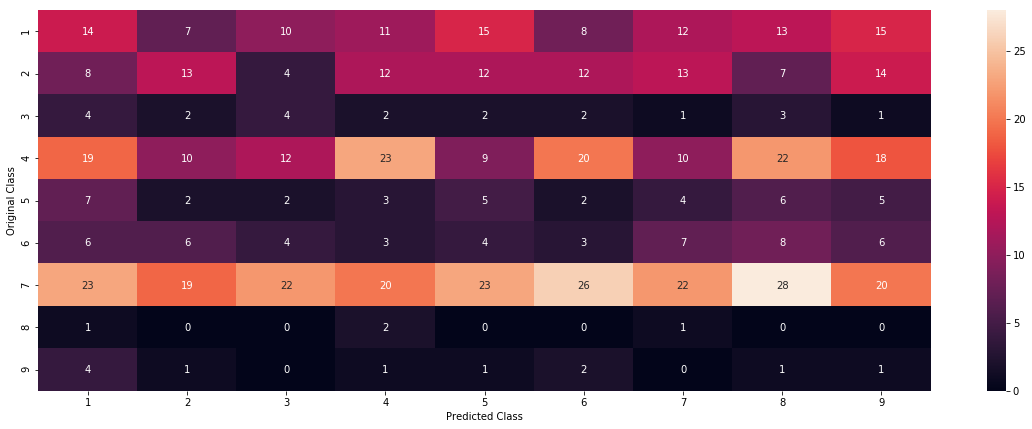

In [42]:
labels = [1,2,3,4,5,6,7,8,9]
plt.figure(figsize = (20,7))
sn.heatmap(C,annot = True,xticklabels = labels,yticklabels = labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [43]:
#Evaluating individual columns to evaluate their importance
#Evaluationg Gene Column
unique_genes = X_train['Gene'].value_counts()
print(unique_genes)

BRCA1      172
TP53        98
BRCA2       85
EGFR        83
PTEN        81
KIT         65
BRAF        60
ERBB2       45
ALK         44
PDGFRA      40
PIK3CA      37
CDKN2A      34
TSC2        33
FGFR3       31
FLT3        31
RET         31
VHL         28
FGFR2       28
MET         27
JAK2        26
MTOR        26
KRAS        22
MLH1        22
MAP2K1      21
SMAD4       20
ROS1        18
PDGFRB      18
NOTCH1      17
PTPRT       16
RUNX1       16
          ... 
CDK6         1
XPO1         1
IL7R         1
RNF43        1
BCL10        1
RXRA         1
FLT1         1
NPM1         1
LATS2        1
FUBP1        1
CDKN2C       1
IKBKE        1
MAPK1        1
LATS1        1
KLF4         1
SDHC         1
CIC          1
PPM1D        1
MEN1         1
SETD2        1
IGF1R        1
FGF4         1
TP53BP1      1
KDM5A        1
CDK8         1
NUP93        1
IDH2         1
AXIN1        1
BCL2         1
EIF1AX       1
Name: Gene, Length: 239, dtype: int64


In [44]:
# one-hot encoding of Gene feature.
gene_vectorize = CountVectorizer()
train_gene_vector = gene_vectorize.fit_transform(X_train['Gene'])
test_gene_vector = gene_vectorize.transform(X_test['Gene'])
cv_gene_vector = gene_vectorize.transform(X_cv['Gene'])

In [45]:
cv_gene_vector.shape

(532, 239)

In [46]:
#Creating a simple SGD in order to evaluate the importance of Gene column
alpha = [0.001,0.01,0.1,1,10]
cv_log_loss = []
for i in alpha:
    clf = SGDClassifier(alpha = i, penalty = 'l2', loss = 'log',random_state = 42)
    clf.fit(train_gene_vector,y_train)
    sig_clf = CalibratedClassifierCV(clf, method = 'sigmoid')
    sig_clf.fit(train_gene_vector,y_train)
    predicted_y = sig_clf.predict_proba(cv_gene_vector)
    cv_log_loss.append(log_loss(y_cv,predicted_y))
    print("For the value of alpha: ",i," the log loss is: ",log_loss(y_cv,predicted_y))
    

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For the value of alpha:  0.001  the log loss is:  1.24471972249
For the value of alpha:  0.01  the log loss is:  1.37142676865


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will chan

For the value of alpha:  0.1  the log loss is:  1.47795878779
For the value of alpha:  1  the log loss is:  1.50775025527


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For the value of alpha:  10  the log loss is:  1.51191774257


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


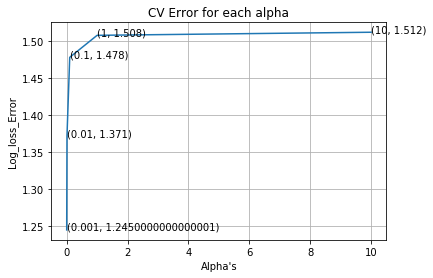

In [47]:
#Plotting the values and their log_losses
fig, ax = plt.subplots()

ax.plot(alpha, cv_log_loss)
for i,txt in enumerate(np.round(cv_log_loss,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],cv_log_loss[i]))
plt.grid()
plt.title("CV Error for each alpha")
plt.xlabel("Alpha's")
plt.ylabel("Log_loss_Error")
plt.show()

In [48]:
#Checking how many values in training set are overlapping for the Gene Column in the test and cross_validation set
Common_text_test = X_test[X_test['Gene'].isin(X_train['Gene'])].shape[0]
Common_text_cv = X_cv[X_cv['Gene'].isin(X_train['Gene'])].shape[0]
test_percent_test = (Common_text_test / len(X_test['Gene']))*100
test_percent_cv = (Common_text_cv / len(X_cv['Gene']))*100
print(test_percent_test)
print(test_percent_cv)

98.34586466165413
97.36842105263158


In [49]:
#Evaluating the variation column just like gene column
unique_variation = X_train['Variation'].value_counts()
print(unique_variation)

Truncating_Mutations          60
Deletion                      48
Amplification                 47
Fusions                       18
Overexpression                 5
E17K                           3
Q61H                           3
Q61L                           3
G12V                           2
M1R                            2
Q209L                          2
G13D                           2
G67R                           2
G35R                           2
Q61K                           2
Promoter_Hypermethylation      2
C618R                          2
I31M                           2
F384L                          2
Y64A                           2
Y42C                           2
T58I                           2
K117N                          2
EWSR1-ETV1_Fusion              2
ETV6-NTRK3_Fusion              2
R841K                          2
TMPRSS2-ETV1_Fusion            2
L983F                          1
E1210K                         1
L607I                          1
          

In [50]:
variation_vectorize = CountVectorizer()
train_variation_vector = variation_vectorize.fit_transform(X_train['Variation'])
test_variation_vector = variation_vectorize.transform(X_test['Variation'])
cv_variation_vector = variation_vectorize.transform(X_cv['Variation'])

In [51]:
#Creating a simple SGD in order to evaluate the importance of Variation column
alpha = [0.001,0.01,0.1,1,10]
cv_log_loss_variation = []
for i in alpha:
    clf = SGDClassifier(alpha = i, penalty = 'l2', loss = 'log',random_state = 42)
    clf.fit(train_variation_vector,y_train)
    sig_clf = CalibratedClassifierCV(clf, method = 'sigmoid')
    sig_clf.fit(train_variation_vector,y_train)
    predicted_y = sig_clf.predict_proba(cv_variation_vector)
    cv_log_loss_variation.append(log_loss(y_cv,predicted_y))
    print("For the value of alpha: ",i," the log loss is: ",log_loss(y_cv,predicted_y))

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For the value of alpha:  0.001  the log loss is:  1.76592510582
For the value of alpha:  0.01  the log loss is:  1.7782184261


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

For the value of alpha:  0.1  the log loss is:  1.79145606475
For the value of alpha:  1  the log loss is:  1.79125754748


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For the value of alpha:  10  the log loss is:  1.79114070038


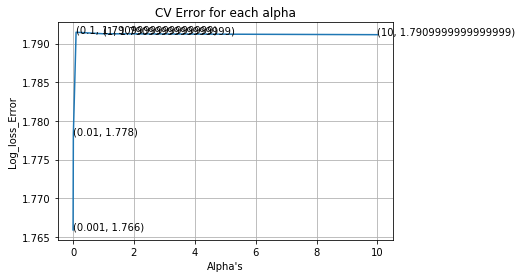

In [52]:
fig, ax = plt.subplots()

ax.plot(alpha, cv_log_loss_variation)
for i,txt in enumerate(np.round(cv_log_loss_variation,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],cv_log_loss_variation[i]))
plt.grid()
plt.title("CV Error for each alpha")
plt.xlabel("Alpha's")
plt.ylabel("Log_loss_Error")
plt.show()

In [53]:
#Evaluating text column
#Function to store word count of the text frame
def word_dict(text):
    dictionay = defaultdict(int)
    for index,row in text.iterrows():
        for word in row['TEXT'].split():
            dictionay[word] += 1
    return dictionay

In [54]:
#Creating a CountVectorizer with all the words that had occured minimum twice
text_vector = CountVectorizer(min_df = 2)
train_text_vector = text_vector.fit_transform(X_train['TEXT'])
#print(train_text_vector)
train_text_features = text_vector.get_feature_names()
train_text_features_count = train_text_vector.sum(axis = 0).A1
train_features_dict = dict(zip(list(train_text_features),train_text_features_count))


In [55]:
print("total number of unique words in the features is: ",len(train_text_features))

total number of unique words in the features is:  44345


In [56]:
#Similarly creating test_text_vector, cv_text_vector and noralizing each of them
train_text_vector = normalize(train_text_vector, axis = 0)
test_text_vector = text_vector.transform(X_test['TEXT'])
cv_text_vector = text_vector.transform(X_cv['TEXT'])
test_text_vector = normalize(test_text_vector, axis = 0)
cv_text_vector = normalize(cv_text_vector, axis = 0)

In [57]:
sorted_train_features_dict = dict(sorted(train_features_dict.items(),key = lambda x:x[1],reverse = True))
sorted_text_occur = np.array(list(sorted_train_features_dict.values()))
#Number of words for a given frequency
print(Counter(sorted_text_occur))

Counter({2: 6414, 4: 3315, 3: 3147, 5: 2040, 6: 1824, 7: 1484, 8: 1481, 9: 983, 10: 927, 11: 891, 12: 822, 13: 727, 14: 605, 16: 569, 15: 543, 19: 461, 18: 432, 17: 430, 21: 345, 20: 333, 24: 304, 22: 295, 26: 278, 23: 271, 25: 256, 27: 241, 30: 235, 28: 223, 32: 213, 33: 209, 31: 203, 29: 185, 36: 175, 34: 168, 42: 164, 35: 163, 47: 162, 39: 150, 45: 140, 50: 138, 37: 136, 41: 135, 38: 134, 40: 132, 44: 118, 57: 112, 48: 111, 49: 108, 51: 107, 46: 105, 59: 103, 53: 101, 43: 101, 55: 100, 60: 94, 52: 93, 61: 91, 56: 90, 54: 90, 69: 89, 58: 82, 70: 80, 63: 78, 64: 71, 72: 70, 65: 70, 66: 66, 76: 65, 75: 65, 68: 65, 67: 65, 62: 64, 86: 62, 71: 62, 73: 58, 78: 56, 77: 55, 91: 54, 90: 54, 80: 53, 100: 52, 85: 51, 81: 51, 74: 51, 82: 50, 83: 48, 96: 47, 88: 47, 84: 45, 79: 45, 122: 44, 104: 44, 94: 44, 98: 43, 89: 43, 103: 42, 101: 41, 93: 41, 92: 41, 87: 41, 97: 40, 135: 37, 111: 37, 108: 37, 102: 37, 110: 36, 125: 35, 107: 35, 99: 35, 95: 35, 113: 34, 105: 34, 128: 33, 123: 33, 106: 33, 1

In [58]:
#Building a model for evaluation of features columns
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_vector, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_vector, y_train)
    predict_y = sig_clf.predict_proba(cv_text_vector)
    cv_log_error_array.append(log_loss(y_cv, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, eps=1e-15))


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For values of alpha =  0.001 The log loss is: 1.37143196453


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For values of alpha =  0.01 The log loss is: 1.48412640712


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For values of alpha =  0.1 The log loss is: 1.68004385412


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For values of alpha =  1 The log loss is: 1.84306321192


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

For values of alpha =  10 The log loss is: 1.86254217811


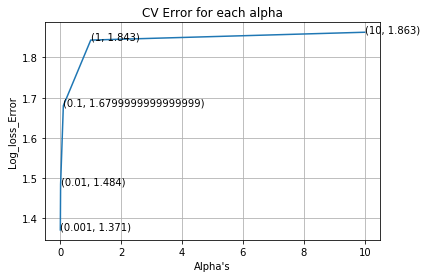

In [59]:
fig, ax = plt.subplots()

ax.plot(alpha, cv_log_error_array)
for i,txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("CV Error for each alpha")
plt.xlabel("Alpha's")
plt.ylabel("Log_loss_Error")
plt.show()

In [60]:
#Checking the overlapping of feature data in test and cv 
def word_intersect(df):
    df_vectorizer = CountVectorizer(min_df = 2)
    df_text_vectorize = df_vectorizer.fit_transform(df['TEXT'])
    df_text_features = df_vectorizer.get_feature_names()
    l1 = len(set(df_text_features))
    l2 = len(set(train_text_features) and set(df_text_features))
    return l1,l2

In [61]:
len1,len2 = word_intersect(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = word_intersect(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

100.0 % of word of test data appeared in train data
100.0 % of word of Cross Validation appeared in train data


In [62]:
#Preparing data for different Machine Learning Models
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [63]:
#Function to plot confusion matrix
def plot_confusion_matrix(test_y,predicted_y):
    C = confusion_matrix(test_y, predict_y)
    labels = [1,2,3,4,5,6,7,8,9]
    print(" "*20, "Confusion matrix", " "*20)
    plt.figure(figsize=(20,7))
    sn.heatmap(C, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


In [64]:
#Function to print number of missclassified points
def missclassified_points(test_y,predicted_y):
    num = np.count_nonzero((predicted_y - test_y))/test_y.shape[0]
    print("Number of missclassified points are: ",num)
    return num

In [65]:
#Combining all three features to create training and test sets

training_X = hstack((train_gene_vector,train_variation_vector))
training_X = hstack((training_X,train_text_vector)).tocsr()
training_Y = np.array(list(X_train['Class']))
test_X = hstack((test_gene_vector,test_variation_vector))
test_X = hstack((test_X,test_text_vector)).tocsr()
test_Y = np.array(list(X_test['Class']))
cv_X = hstack((cv_gene_vector,cv_variation_vector))
cv_X = hstack((cv_X,cv_text_vector)).tocsr()
cv_Y = np.array(list(X_cv['Class']))


In [66]:
print("number of data points in train data = ", training_X.shape[0])
print("number of data points number of features in test data = ", test_X.shape[0])
print("number of data points number of features in cross validation data =", cv_X.shape[0])

number of data points in train data =  2124
number of data points number of features in test data =  665
number of data points number of features in cross validation data = 532


# Building Machine Learning Models

# Naive Bayes

In [67]:
#Building Machine Learning models
#1. Naive Bayes
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(training_X, training_Y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(training_X, training_Y)
    sig_clf_probs = sig_clf.predict_proba(cv_X)
    cv_log_error_array.append(log_loss(cv_Y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_Y, sig_clf_probs)) 

for alpha = 1e-05


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.36316814081
for alpha = 0.0001


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.34798484619
for alpha = 0.001


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.34012884963
for alpha = 0.1


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.33384686369
for alpha = 1


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.38873347014
for alpha = 10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.47682000085
for alpha = 100


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.54457035201
for alpha = 1000


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.5468481921


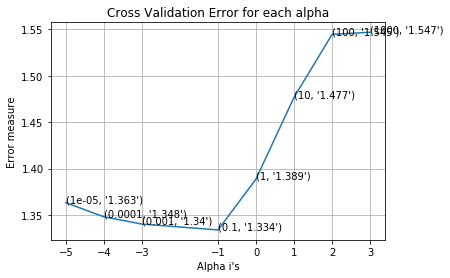

In [68]:
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array)
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [69]:
#Using the best alpha for final Naive Bayes model
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha = alpha[best_alpha])
clf.fit(training_X, training_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(training_X, training_Y)

predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The train loss for the best alpha value is:  0.839277160081
The cross validation loss for the best alpha value is:  1.33384686369
The test loss for the best alpha value is:  1.23474114322


Number of missclassified points are:  0.37894736842105264
The accuray score for the model is:  0.6210526315789473
                     Confusion matrix                     


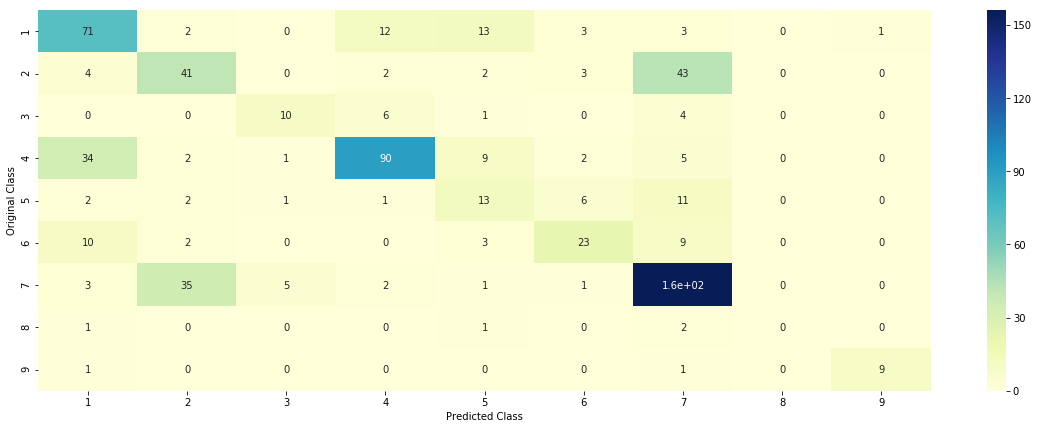

In [70]:
predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

In [71]:
#Testing on a random point
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_X[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_X[test_point_index]),4))
print("Actual Class :", test_Y[test_point_index])

Predicted Class : 7
Predicted Class Probabilities: [[ 0.086   0.0722  0.0121  0.0888  0.0345  0.0295  0.6709  0.0035  0.0026]]
Actual Class : 5


# K Nearest Neighbour

In [72]:
#Implementing K Nearest Neighbour
#Since we need to decide the number of neighbours in the KNN, we would take a range of values
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(training_X, training_Y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(training_X, training_Y)
    sig_clf_probs = sig_clf.predict_proba(cv_X)
    cv_log_error_array.append(log_loss(cv_Y, sig_clf_probs))
    print("Log Loss :",log_loss(cv_Y, sig_clf_probs))

for alpha = 5


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.31005157898
for alpha = 11


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.30847956649
for alpha = 15


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.34567535086
for alpha = 21


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.44606225029
for alpha = 31


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.48746767207
for alpha = 41


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.48177820195
for alpha = 51


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.46239600485
for alpha = 99


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.5077811454


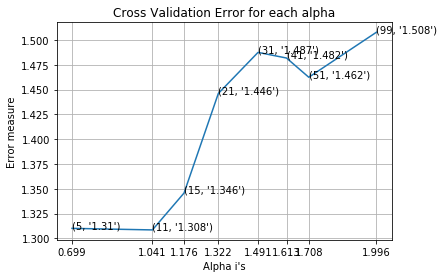

In [73]:
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array)
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [74]:
best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors = alpha[best_alpha])
clf.fit(training_X, training_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(training_X, training_Y)

predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The train loss for the best alpha value is:  1.09690757268
The cross validation loss for the best alpha value is:  1.30847956649
The test loss for the best alpha value is:  1.29589638324


Number of missclassified points are:  0.42406015037593986
The accuray score for the model is:  0.5759398496240602
                     Confusion matrix                     


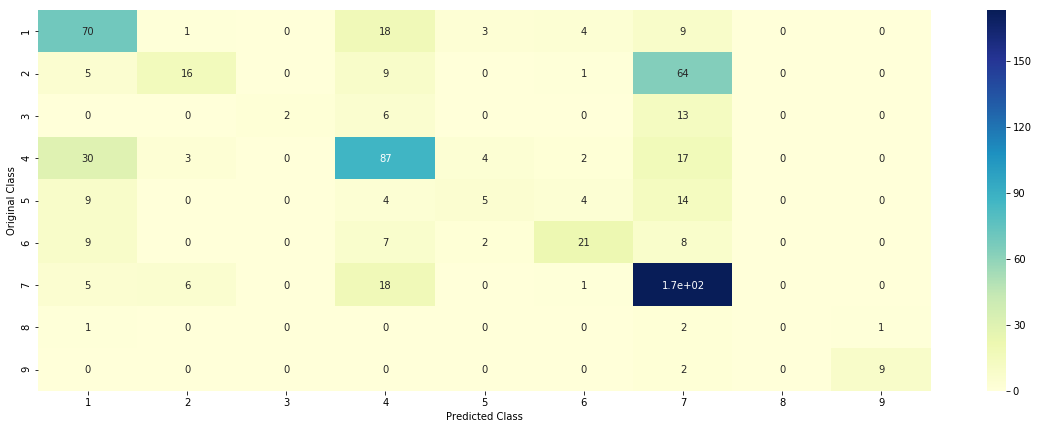

In [75]:
predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

In [76]:
#Testing a random pont
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_X[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_X[test_point_index]),4))
print("Actual Class :", test_Y[test_point_index])

Predicted Class : 7
Predicted Class Probabilities: [[ 0.0453  0.2639  0.0137  0.1203  0.0223  0.0327  0.4937  0.0041  0.0039]]
Actual Class : 5


# Logistic Regression Model 

In [77]:
#Implementing Logistic Regression model
clf = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class= 'multinomial')
clf.fit(training_X, training_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(training_X, training_Y)
sig_clf_probs = sig_clf.predict_proba(cv_X)
print("Log Loss :",log_loss(cv_Y, sig_clf_probs))

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.14303838965


In [78]:
predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))

The train loss for the best alpha value is:  0.543534745732
The cross validation loss for the best alpha value is:  1.14303838965
The test loss for the best alpha value is:  0.995029616699


Number of missclassified points are:  0.33533834586466166
The accuray score for the model is:  0.6646616541353383
                     Confusion matrix                     


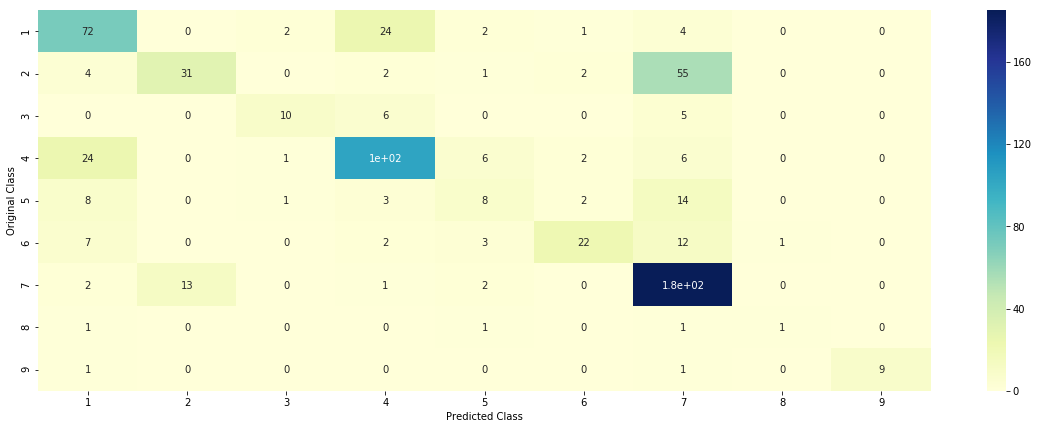

In [79]:
predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

# Stochastic Gradient Descent 

In [93]:
#Implementing Stochastic Gradient Descent with balancing all classes
alpha = [10 ** x for x in range(-4, 4)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42, max_iter = 100)
    clf.fit(training_X, training_Y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(training_X, training_Y)
    sig_clf_probs = sig_clf.predict_proba(cv_X)
    cv_log_error_array.append(log_loss(cv_Y, sig_clf_probs, eps=1e-15))
    print("Log Loss :",log_loss(cv_Y, sig_clf_probs)) 


for alpha = 0.0001


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.21956868863
for alpha = 0.001


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.23310928101
for alpha = 0.01


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.27281438309
for alpha = 0.1


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.75819914309
for alpha = 1


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.92877601249
for alpha = 10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.94021042539
for alpha = 100


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.94124502768
for alpha = 1000


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.94138359512


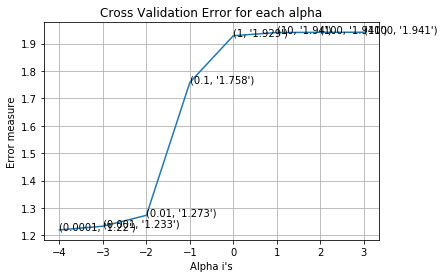

In [94]:
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array)
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [95]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42, max_iter = 100)
clf.fit(training_X, training_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(training_X, training_Y)

predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

The train loss for the best alpha value is:  0.435533683819
The cross validation loss for the best alpha value is:  1.21956868863
The test loss for the best alpha value is:  1.04637655722


Number of missclassified points are:  0.3263157894736842
The accuray score for the model is:  0.6736842105263158
                     Confusion matrix                     


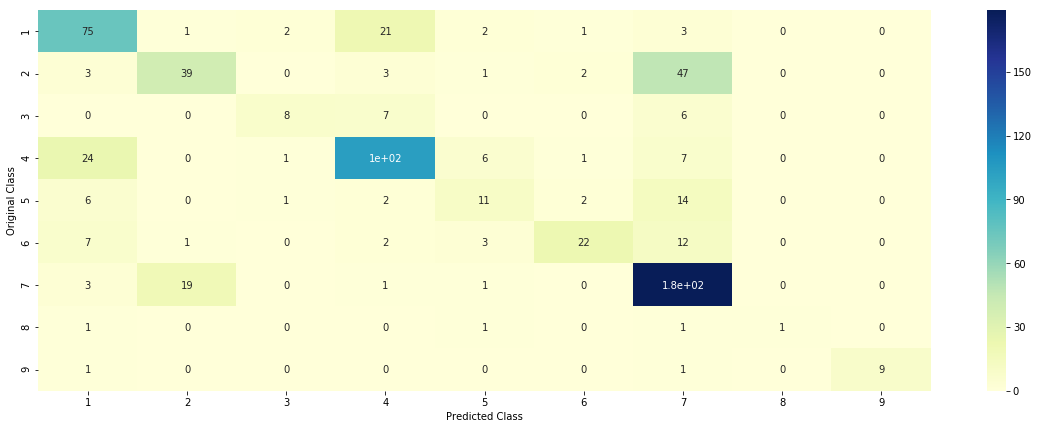

In [96]:
predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

In [84]:
#Testing a random pont
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_X[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_X[test_point_index]),4))
print("Actual Class :", test_Y[test_point_index])

Predicted Class : 7
Predicted Class Probabilities: [[ 0.0301  0.1693  0.0034  0.0189  0.012   0.0049  0.7557  0.0037  0.002 ]]
Actual Class : 5


# Stochastic Gradient Descent with Class Balancing

for alpha = 0.0001


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.27113683106
for alpha = 0.001


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.27681983146
for alpha = 0.01


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.41123672706
for alpha = 0.1


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.54230980365
for alpha = 1


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.77923784853
for alpha = 10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.81111123478
for alpha = 100


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.81430838775
for alpha = 1000


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

Log Loss : 1.81465238295


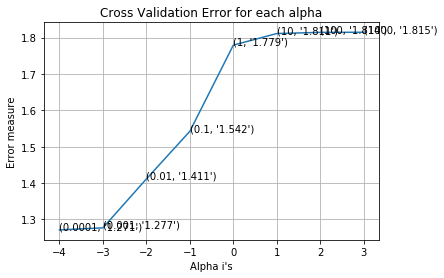

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which

The train loss for the best alpha value is:  0.439463003706
The cross validation loss for the best alpha value is:  1.27113683106
The test loss for the best alpha value is:  1.0586870927
Number of missclassified points are:  0.32781954887218046
The accuray score for the model is:  0.6721804511278195
                     Confusion matrix                     


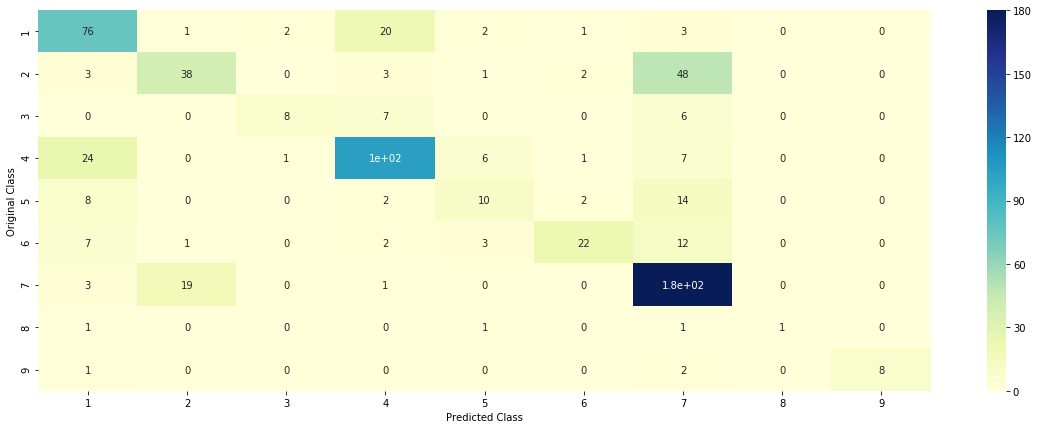

In [85]:
#Implementing Stochastic Gradient Descent with balancing all classes
alpha = [10 ** x for x in range(-4, 4)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42, max_iter = 100)
    clf.fit(training_X, training_Y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(training_X, training_Y)
    sig_clf_probs = sig_clf.predict_proba(cv_X)
    cv_log_error_array.append(log_loss(cv_Y, sig_clf_probs, eps=1e-15))
    print("Log Loss :",log_loss(cv_Y, sig_clf_probs)) 

    
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array)
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42, max_iter = 100)
clf.fit(training_X, training_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(training_X, training_Y)

predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))


predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

In [86]:
#Testing a random pont
test_point_index = 10
no_feature = 100
predicted_cls = sig_clf.predict(test_X[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_X[test_point_index]),4))
print("Actual Class :", test_Y[test_point_index])

Predicted Class : 7
Predicted Class Probabilities: [[  3.30000000e-02   1.65900000e-01   2.80000000e-03   2.03000000e-02
    1.13000000e-02   4.70000000e-03   7.56700000e-01   5.10000000e-03
    3.00000000e-04]]
Actual Class : 5


# Random Forest Classifier

In [87]:
#Implementing Random Forest Classifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(training_X, training_Y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(training_X, training_Y)
        sig_clf_probs = sig_clf.predict_proba(cv_X)
        cv_log_error_array.append(log_loss(cv_Y, sig_clf_probs, eps=1e-15))
        print("Log Loss :",log_loss(cv_Y, sig_clf_probs)) 


for n_estimators = 100 and max depth =  5


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.29021447856
for n_estimators = 100 and max depth =  10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.24976805028
for n_estimators = 200 and max depth =  5


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.28265788111
for n_estimators = 200 and max depth =  10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.23710229761
for n_estimators = 500 and max depth =  5


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.2742604681
for n_estimators = 500 and max depth =  10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.22630089606
for n_estimators = 1000 and max depth =  5


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.27727194474
for n_estimators = 1000 and max depth =  10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.21951907857
for n_estimators = 2000 and max depth =  5


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.27247240516
for n_estimators = 2000 and max depth =  10


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Log Loss : 1.2176231632


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The train loss for the best alpha value is:  0.648472829434
The cross validation loss for the best alpha value is:  1.2176231632
The test loss for the best alpha value is:  1.14430862252
Number of missclassified points are:  0.3894736842105263
The accuray score for the model is:  0.6105263157894737
                     Confusion matrix                     


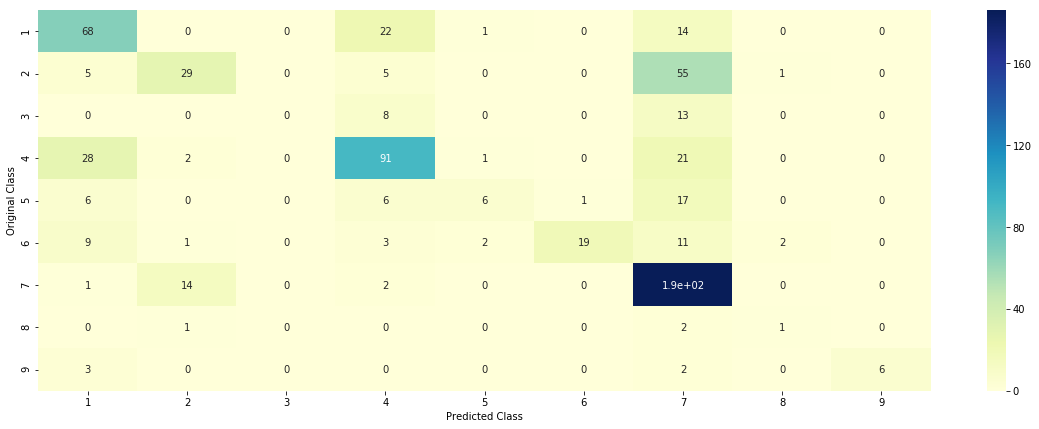

In [88]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
clf.fit(training_X, training_Y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(training_X, training_Y)

predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))


predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

In [89]:
np.argsort(-clf.feature_importances_)

array([23938,  2696, 43812, ...,  6213,  6218, 46538])

# Stacking Classifier 

In [90]:
#Implementing a Stacking Classifier

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(training_X, training_Y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(training_X, training_Y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(training_X, training_Y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(training_X, training_Y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_Y, sig_clf1.predict_proba(cv_X))))
sig_clf2.fit(training_X, training_Y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_Y, sig_clf2.predict_proba(cv_X))))
sig_clf3.fit(training_X, training_Y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_Y, sig_clf3.predict_proba(cv_X))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(training_X, training_Y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_Y, sclf.predict_proba(cv_X))))
    log_error =log_loss(cv_Y, sclf.predict_proba(cv_X))
    if best_alpha > log_error:
        best_alpha = log_error

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Logistic Regression :  Log Loss: 1.26


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Support vector machines : Log Loss: 1.93


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Naive Bayes : Log Loss: 1.34
--------------------------------------------------


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.048


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.562


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.228


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.379


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.686


/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

The train loss for the best alpha value is:  0.609679797397
The cross validation loss for the best alpha value is:  1.22795281025
The test loss for the best alpha value is:  1.12405663117
Number of missclassified points are:  0.362406015037594
The accuray score for the model is:  0.6375939849624059
                     Confusion matrix                     


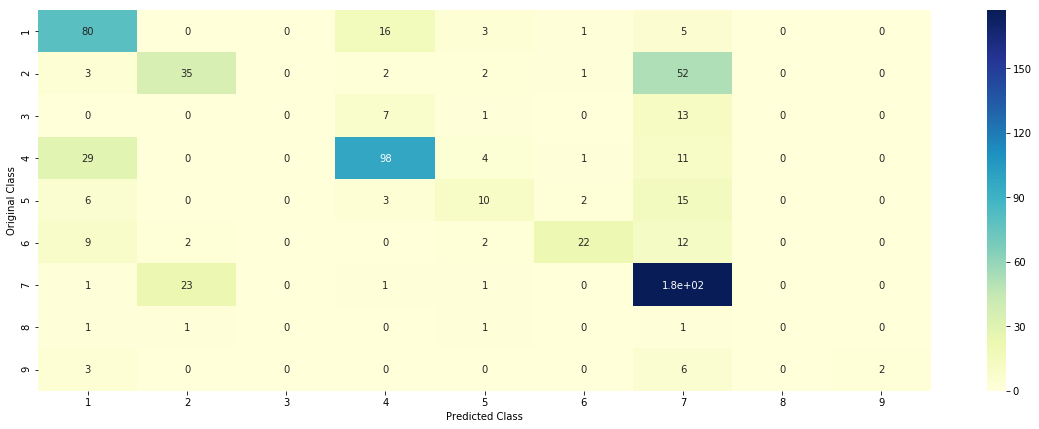

In [91]:
lr = LogisticRegression(C=0.1)
sig_clf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sig_clf.fit(training_X, training_Y)

predict_y = sig_clf.predict_proba(training_X)
print("The train loss for the best alpha value is: ",log_loss(training_Y,predict_y))
predict_y = sig_clf.predict_proba(cv_X)
print("The cross validation loss for the best alpha value is: ",log_loss(cv_Y,predict_y))
predict_y = sig_clf.predict_proba(test_X)
print("The test loss for the best alpha value is: ",log_loss(test_Y,predict_y))


predict_y = sig_clf.predict(test_X)
x = missclassified_points(test_Y,predict_y)
print("The accuray score for the model is: ",(1-x))
plot_confusion_matrix(test_Y,predict_y)

# Voting Classifier

/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/krupal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, def

Log loss (train) on the VotingClassifier : 0.87008879343
Log loss (CV) on the VotingClassifier : 1.29075626022
Log loss (test) on the VotingClassifier : 1.18212236542
Number of missclassified point : 0.35037593984962406
Accuracy :  0.649624060150376
                     Confusion matrix                     


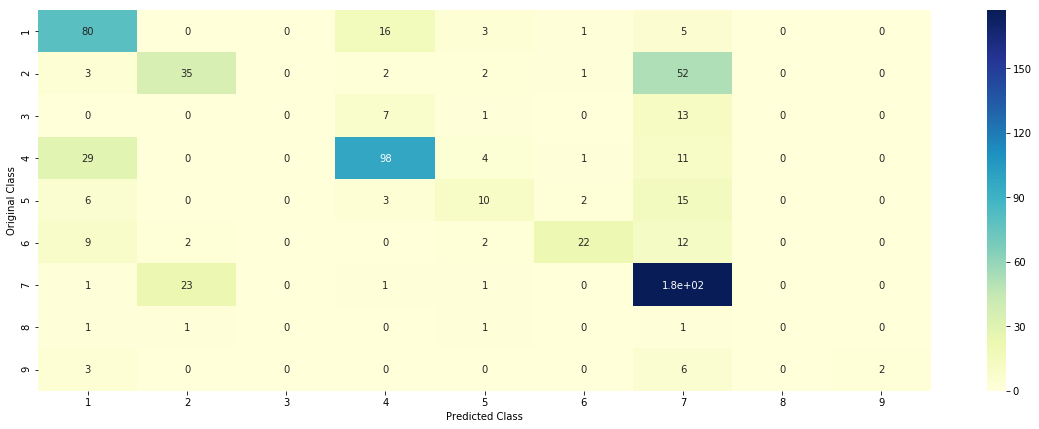

In [92]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(training_X, training_Y)
print("Log loss (train) on the VotingClassifier :", log_loss(training_Y, vclf.predict_proba(training_X)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_Y, vclf.predict_proba(cv_X)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_Y, vclf.predict_proba(test_X)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_X)- test_Y))/test_Y.shape[0])
print("Accuracy : ",(1 - ( np.count_nonzero((vclf.predict(test_X)- test_Y))/test_Y.shape[0])))
plot_confusion_matrix(test_Y, vclf.predict(test_X))

In [101]:
## The below code is used for submission on Kaggle


test_variants = pd.read_csv('/home/krupal/Downloads/stage2_test_variants.csv')
test_texts = pd.read_csv('/home/krupal/Downloads/stage2_test_text.csv',sep = "\|\|",engine = 'python',names = ['ID','TEXT'],skiprows = 1)

In [102]:
for index,row in test_texts.iterrows():
    if type(row['TEXT']) is str:
        data_preprocessing(row['TEXT'],index,'TEXT')

/home/krupal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [105]:
final_data_test = pd.merge(test_variants,test_texts,on = 'ID',how = 'left')

In [106]:
final_data_test[final_data_test.isnull().any(axis = 1)]

,ID,Gene,Variation,TEXT


In [108]:
final_data_test.Gene = final_data_test.Gene.str.replace('\s+','_')
final_data_test.Variation = final_data_test.Variation.str.replace('\s+','_')

In [109]:
final_test_gene_vector = gene_vectorize.transform(final_data_test['Gene'])


In [110]:
final_test_variation_vector = variation_vectorize.transform(final_data_test['Variation'])

In [112]:
final_test_text_vector = text_vector.transform(final_data_test['TEXT'])
final_test_text_vector = normalize(final_test_text_vector, axis = 0)

In [113]:
final_test = hstack((final_test_gene_vector,final_test_variation_vector))
final_test = hstack((final_test,final_test_text_vector)).tocsr()

In [114]:
predictions = sig_clf.predict(final_test)

In [117]:
predictions

array([7, 1, 7, 7, 7, 7, 7, 1, 4, 7, 4, 2, 1, 7, 2, 1, 7, 7, 7, 7, 7, 4, 7,
       2, 7, 7, 7, 4, 2, 2, 7, 4, 4, 7, 1, 4, 1, 7, 7, 7, 7, 7, 1, 4, 1, 7,
       7, 4, 4, 7, 7, 1, 7, 7, 7, 7, 4, 4, 4, 6, 7, 7, 1, 1, 6, 7, 2, 1, 7,
       7, 1, 1, 7, 7, 3, 7, 1, 4, 5, 7, 4, 5, 7, 7, 7, 7, 7, 1, 7, 7, 4, 1,
       7, 7, 7, 1, 2, 4, 7, 7, 4, 7, 4, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 1, 2,
       4, 2, 1, 7, 7, 7, 2, 7, 7, 6, 7, 1, 1, 7, 4, 7, 1, 7, 1, 7, 7, 2, 7,
       4, 7, 7, 7, 7, 4, 7, 7, 4, 4, 5, 1, 5, 5, 2, 4, 2, 7, 7, 7, 7, 1, 1,
       7, 4, 1, 1, 7, 7, 7, 1, 4, 7, 4, 1, 5, 7, 5, 1, 1, 7, 7, 7, 7, 7, 6,
       7, 4, 2, 7, 7, 7, 7, 7, 7, 1, 1, 4, 1, 1, 7, 2, 1, 6, 2, 7, 1, 7, 4,
       7, 5, 7, 7, 4, 1, 6, 7, 5, 2, 7, 1, 7, 7, 7, 4, 1, 2, 4, 7, 1, 1, 4,
       7, 7, 7, 7, 1, 1, 1, 2, 1, 1, 7, 7, 7, 4, 7, 2, 1, 1, 7, 1, 2, 4, 7,
       1, 1, 6, 1, 7, 2, 4, 4, 7, 7, 1, 1, 7, 7, 4, 7, 6, 6, 7, 4, 7, 7, 7,
       4, 1, 7, 7, 7, 7, 4, 1, 7, 1, 2, 4, 7, 7, 2, 4, 7, 7, 2, 7, 1, 7, 7,
       7, 4,

In [118]:
my_submission = pd.DataFrame({'ID':final_data_test.ID , 'class': predictions})


In [121]:
dummy = pd.get_dummies(my_submission['class'])

In [124]:
my_submission = pd.concat([my_submission,dummy],axis = 1)

In [126]:
my_submission = my_submission.drop('class',axis = 1)

In [128]:
my_submission.to_csv('/home/krupal/Documents/submission_Cancer_Treatment.csv',index = False)